In [1]:
import numpy as np
import pandas as pd

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
combine = [train_df, test_df]

In [4]:
#1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.

train_df['Sex'].str.get_dummies().corrwith(train_df['Survived']/train_df['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

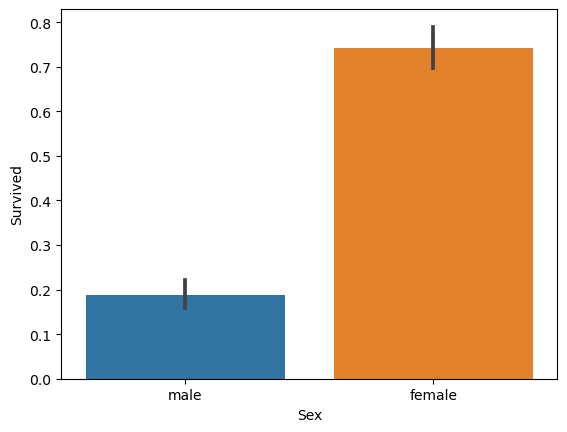

In [6]:
#2. Do at least two visualizations to describe or show correlations.

import seaborn as sns   #For Visualisation import seaborn library
import matplotlib.pyplot as plt
sns.barplot(x = train_df['Sex'], y = train_df['Survived'])   

<AxesSubplot:xlabel='Age', ylabel='Survived'>

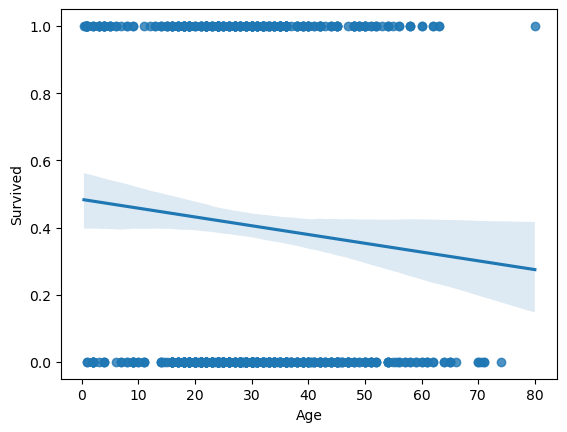

In [7]:
sns.regplot(x = train_df['Age'], y = train_df['Survived'])   #Regression Plot

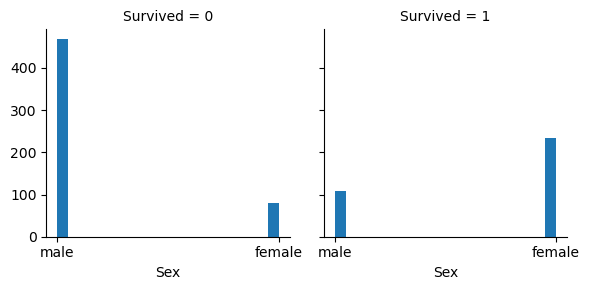

In [8]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)   #Multi-plot grids

In [9]:
#3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.

# To implement naive bayes on Titanic data set, first we need to preprocess the data
#Data Preprocessing
#Removing few features from the raw data
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp', 'Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp', 'Name'], axis=1)
combine = [train_df, test_df]

In [10]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)  #Converting Categorical Feature

In [11]:
print(train_df.isnull().sum())   #Checking any Null values present in the dataset

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64


In [12]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
#Replacing missing values in Embarked Column
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [14]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [15]:
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)

Mean Age =  29


In [16]:
#Replacing missing values in Age column with mean and in Fare column with median
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

In [17]:
#Implementing Naive Bayes on Preprocessed data

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop('PassengerId', axis=1).copy()
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, Y_train)

0.77665544332211

In [21]:
#(Glass Dataset)

In [22]:
# 1. Implement Naïve Bayes method using scikit-learn library.
# a. Use the glass dataset available in Link also provided in your assignment.

In [23]:
import numpy as np
import pandas as pd 

In [24]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
# b. Use train_test_split to create training and testing part.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_true = train_test_split(glass[::-1], glass['Type'], test_size = 0.2, random_state = 0)

In [28]:
#2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         2
           7       0.46      1.00      0.63         6

    accuracy                           0.77        43
   macro avg       0.45      0.57      0.48        43
weighted avg       0.73      0.77      0.73        43

[[ 9  0  0  0  0  0]
 [ 0 17  0  2  0  0]
 [ 0  0  0  1  0  4]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  6]]
accuracy is 0.7674418604651163


C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# 1. Implement linear SVM method using scikit library
# a. Use the glass dataset available in Link also provided in your assignment.

In [31]:
import numpy as np
import pandas as pd
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [32]:
# b. Use train_test_split to create training and testing part.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_true = train_test_split(glass[::-1], glass['Type'], test_size = 0.2, random_state = 0)

In [34]:
# 2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset.

<AxesSubplot:xlabel='Type', ylabel='Ca'>

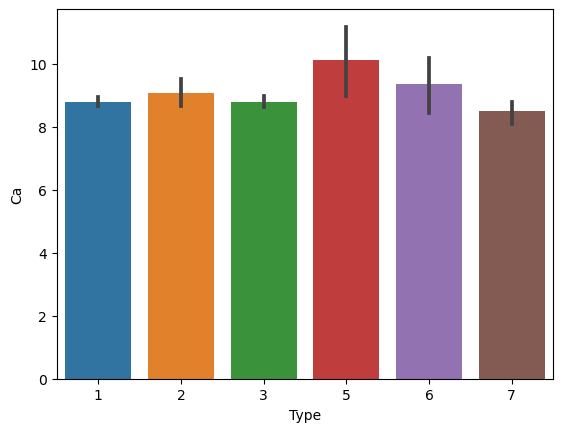

In [37]:
import seaborn as sns   #For Visualisation import seaborn library
import matplotlib.pyplot as plt
sns.barplot(x = glass['Type'], y = glass['Ca']) 

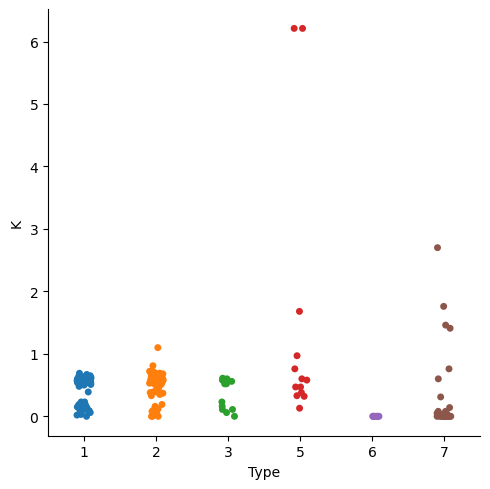

In [38]:
sns.catplot(data=glass, x="Type", y="K")

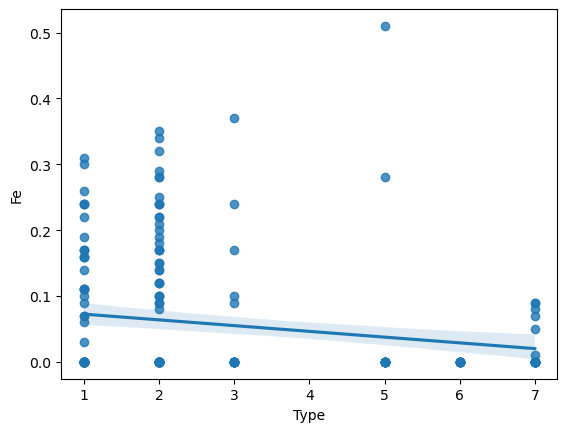

In [39]:
sns.regplot(x="Type", y="Fe", data=glass);